## Spectral centroid versus duration
The duration of the sound clips ranges from 0.5 sec to 3.65 sec. 

In [1]:
%matplotlib inline
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import math
from __future__ import division

In [2]:
import wave
import contextlib
import spectral_centroid as scentroid

In [9]:
from scipy.signal import hilbert

In [21]:
from scipy.io import wavfile
from librosa import onset

### Getting information on all the sounds

Getting the mean spectral centroid of each of the sound files and the length of each sound

In [3]:
cwd = os.getcwd()

In [4]:
sc = []
dur = []

In [5]:
for i in range(13):
    sc_dir = os.path.join(cwd, "stimuli_v1", "sounds", str(150*i))

    for filename in os.listdir(sc_dir):
        sound_file = os.path.join(sc_dir, filename)
        
        if filename == ".DS_Store":
            os.remove(sound_file)
            continue
            
        spec = scentroid.mean_sc_for_file(sound_file)
        with contextlib.closing(wave.open(sound_file,'r')) as f:
            frames = f.getnframes()
            rate = f.getframerate()
            duration = frames / float(rate)
            
            if duration > 3.7:
                print filename

        dur.append(duration)
        sc.append(spec)

### Plotting

Plotting spectral centroid versus sound duration

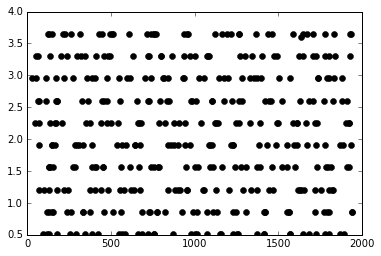

In [6]:
plt.plot(sc, dur, 'ko')

### Covariance matrix

In [7]:
cov_data = np.array([sc, dur])

In [8]:
np.corrcoef(cov_data)

array([[ 1.        , -0.00843005],
       [-0.00843005,  1.        ]])

## Spectral centroid versus amplitude envelope

In [36]:
cwd = os.getcwd()

In [37]:
sc = []
num_onsets = []
onset_strength = []

In [38]:
for i in range(13):
    sc_dir = os.path.join(cwd, "stimuli_v1", "sounds", str(150*i))

    for filename in os.listdir(sc_dir):
        sound_file = os.path.join(sc_dir, filename)
        
        if filename == ".DS_Store":
            os.remove(sound_file)
            continue
            
        audio_ts = wavfile.read(sound_file)

        onset_data = onset.onset_detect(audio_ts[1], audio_ts[0])
        mean_strength = np.mean(onset.onset_strength(audio_ts[1], 
                                                      audio_ts[0]))
        
        spec = scentroid.mean_sc_for_file(sound_file)
        
        sc.append(spec)
        num_onsets.append(len(onset_data))
        onset_strength.append(mean_strength)
        

### Plotting

**Spectral centroid versus number of onsets**

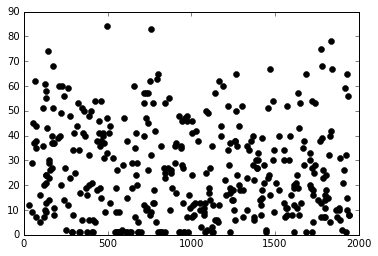

In [45]:
plt.plot(sc, num_onsets, 'ko')

**Spectral centroid versus mean onset strength**

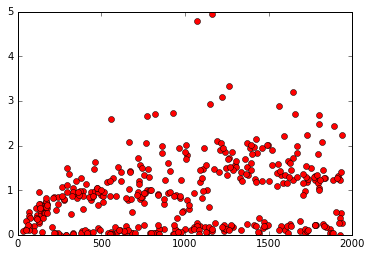

In [46]:
plt.plot(sc, onset_strength, 'ro')

### Covariance matrix

Spectral centroid vs number of onsets vs mean onset strength

In [47]:
cov_data = np.array([sc, dur, num_onsets, onset_strength])

In [48]:
np.corrcoef(cov_data)

array([[ 1.        , -0.00843005, -0.07733421,  0.26362231],
       [-0.00843005,  1.        ,  0.66912301, -0.04630048],
       [-0.07733421,  0.66912301,  1.        ,  0.13259625],
       [ 0.26362231, -0.04630048,  0.13259625,  1.        ]])